In [6]:
# Inspect NPPES Data Structure
print("🔍 NPPES Data Structure Inspection")
print("="*50)

# Show column names
print("Columns in NPPES dataset:")
print(df.columns.tolist())
print("\n" + "="*50)

# Show first few rows with all columns
print("First 3 rows (all columns):")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
print(df.head(3))
print("\n" + "="*50)

# Focus on address-related columns
print("Address-related columns:")
address_cols = [col for col in df.columns if 'address' in col.lower()]
print(address_cols)

if 'addresses' in df.columns:
    print("\nSample of 'addresses' column:")
    print("Type:", type(df['addresses'].iloc[0]))
    print("First few values:")
    for i in range(min(3, len(df))):
        print(f"Row {i}: {df['addresses'].iloc[i]}")
        print(f"  Type: {type(df['addresses'].iloc[i])}")
        if isinstance(df['addresses'].iloc[i], list):
            print(f"  Length: {len(df['addresses'].iloc[i])}")
            if len(df['addresses'].iloc[i]) > 0:
                print(f"  First item: {df['addresses'].iloc[i][0]}")
        print()

# Check for any other location/address related data
print("Checking for other location data...")
for col in df.columns:
    sample_val = df[col].iloc[0] if len(df) > 0 else None
    if sample_val and isinstance(sample_val, (dict, list)):
        print(f"Column '{col}': {type(sample_val)} - {sample_val}")

🔍 NPPES Data Structure Inspection
Columns in NPPES dataset:
['npi', 'provider_name', 'credentials', 'gender', 'enumeration_date', 'last_updated', 'addresses', 'primary_specialty', 'secondary_specialties', 'provider_type', 'metadata']

First 3 rows (all columns):
          npi  \
0  1699775759   
1  1356682017   
2  1720676802   

                                                           provider_name  \
0  {'first': 'RAJA', 'last': 'VARMA', 'middle': 'GUNTURI', 'suffix': ''}   
1      {'first': 'RASHI', 'last': 'KOCHHAR', 'middle': '', 'suffix': ''}   
2     {'first': 'BAILEY', 'last': 'WALTERS', 'middle': '', 'suffix': ''}   

  credentials gender          enumeration_date              last_updated  \
0        [MD]      M 2005-07-29 00:00:00+00:00 2021-04-22 00:00:00+00:00   
1       [M.D]      F 2013-03-06 00:00:00+00:00 2024-10-07 00:00:00+00:00   
2     [DNP-P]      F 2021-01-05 00:00:00+00:00 2024-07-17 00:00:00+00:00   

                                                          

ValueError: The truth value of an empty array is ambiguous. Use `array.size > 0` to check that an array is not empty.


🗺️ Geographic Analysis
Providers with state information: 50

Top 20 States:
NY    46
NJ     2
CT     1
FL     1
Name: count, dtype: int64


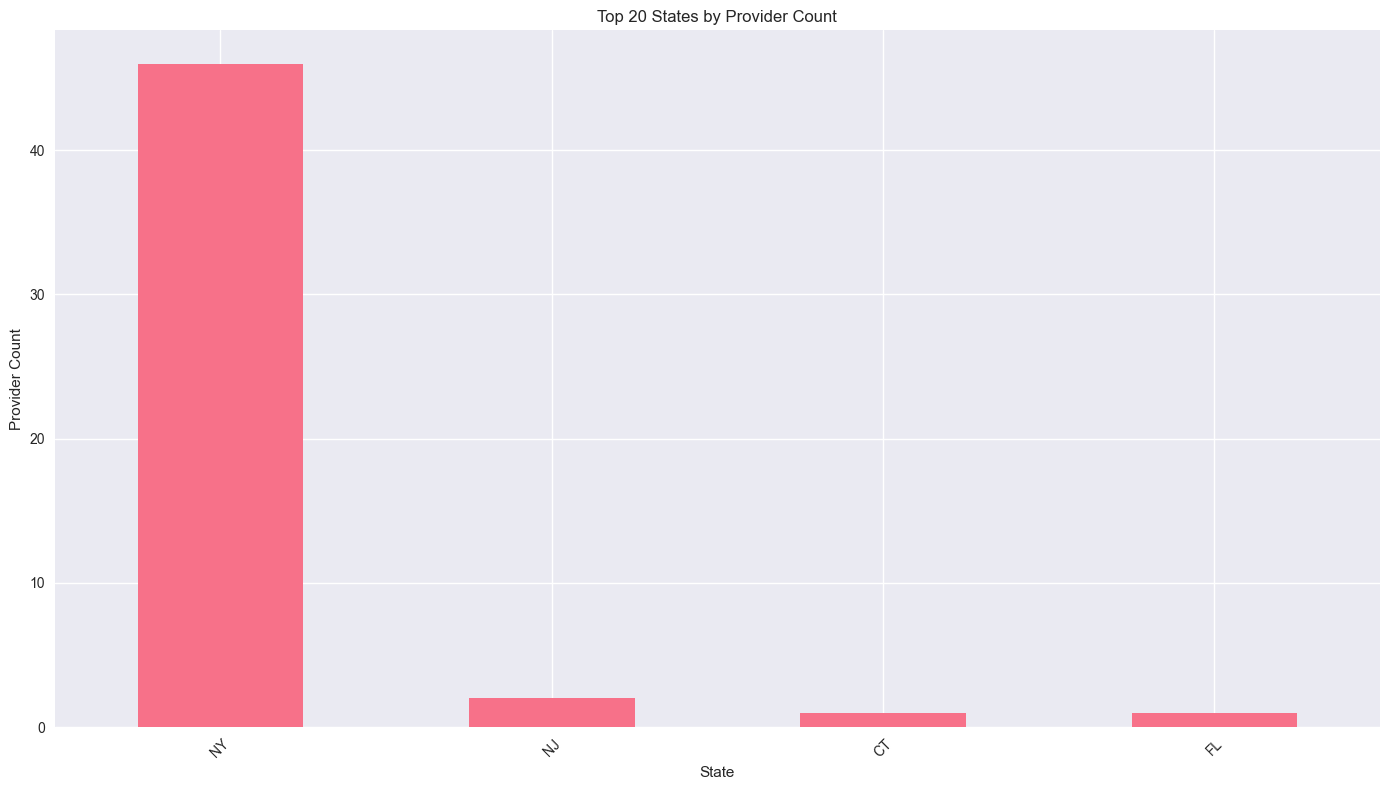


Address Types:
DOM    50
Name: count, dtype: int64


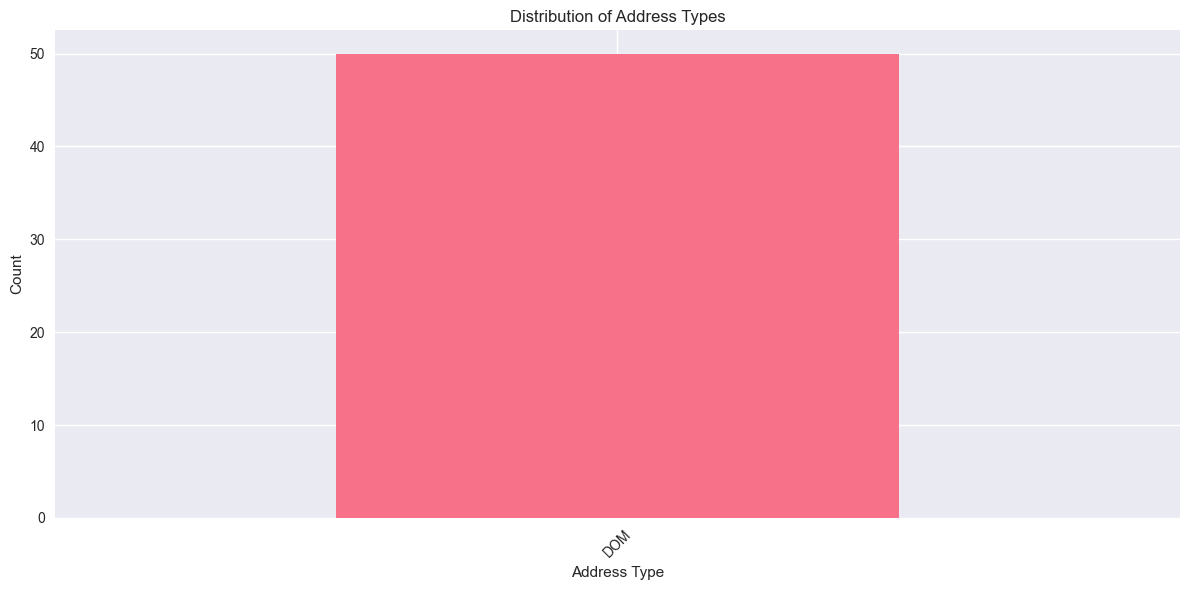

In [7]:
# Geographic Analysis - Fixed for numpy arrays
print("\n🗺️ Geographic Analysis")
print("="*50)

# Extract states from addresses (handling numpy arrays)
states = []
for addresses in df['addresses']:
    if isinstance(addresses, np.ndarray) and addresses.size > 0:
        for addr in addresses:
            if isinstance(addr, dict) and 'state' in addr and addr['state']:
                states.append(addr['state'])
    elif isinstance(addresses, list) and len(addresses) > 0:
        for addr in addresses:
            if isinstance(addr, dict) and 'state' in addr and addr['state']:
                states.append(addr['state'])

state_counts = pd.Series(states).value_counts()
print(f"Providers with state information: {len(states):,}")

if len(states) > 0:
    print("\nTop 20 States:")
    print(state_counts.head(20))
    
    # Visualize top states
    plt.figure(figsize=(14, 8))
    state_counts.head(20).plot(kind='bar')
    plt.title('Top 20 States by Provider Count')
    plt.xlabel('State')
    plt.ylabel('Provider Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No state information found in the dataset.")

# Address type analysis (handling numpy arrays)
address_types = []
for addresses in df['addresses']:
    if isinstance(addresses, np.ndarray) and addresses.size > 0:
        for addr in addresses:
            if isinstance(addr, dict) and 'type' in addr:
                address_types.append(addr['type'])
    elif isinstance(addresses, list) and len(addresses) > 0:
        for addr in addresses:
            if isinstance(addr, dict) and 'type' in addr:
                address_types.append(addr['type'])

address_type_counts = pd.Series(address_types).value_counts()
print("\nAddress Types:")
print(address_type_counts)

if len(address_types) > 0:
    # Visualize address types
    plt.figure(figsize=(12, 6))
    address_type_counts.plot(kind='bar')
    plt.title('Distribution of Address Types')
    plt.xlabel('Address Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No address type information found in the dataset.")


🏥 Specialty and Taxonomy Analysis
Specialty-related columns:
['primary_specialty']

📋 Primary Specialty Analysis
Primary specialty column info:
Type: <class 'str'>
Sample values:
  Row 0: Internal Medicine, Cardiovascular Disease
  Row 1: Pediatrics, Sleep Medicine
  Row 2: Nurse Practitioner, Psych/Mental Health
  Row 3: Psychiatry & Neurology, Addiction Psychiatry
  Row 4: Internal Medicine, Medical Oncology

Total primary specialty entries: 82
Unique primary specialties: 30

Top 20 Primary Specialties:
Nurse Practitioner         9
Internal Medicine          8
Psychiatry & Neurology     6
Psych/Mental Health        5
Social Worker              4
Physician Assistant        4
Family                     4
Diagnostic Radiology       4
Radiology                  4
Emergency Medicine         4
Psychiatry                 4
Clinical                   3
Pediatrics                 2
Medical Oncology           2
Anesthesiology             2
Obstetrics & Gynecology    2
Midwife                 

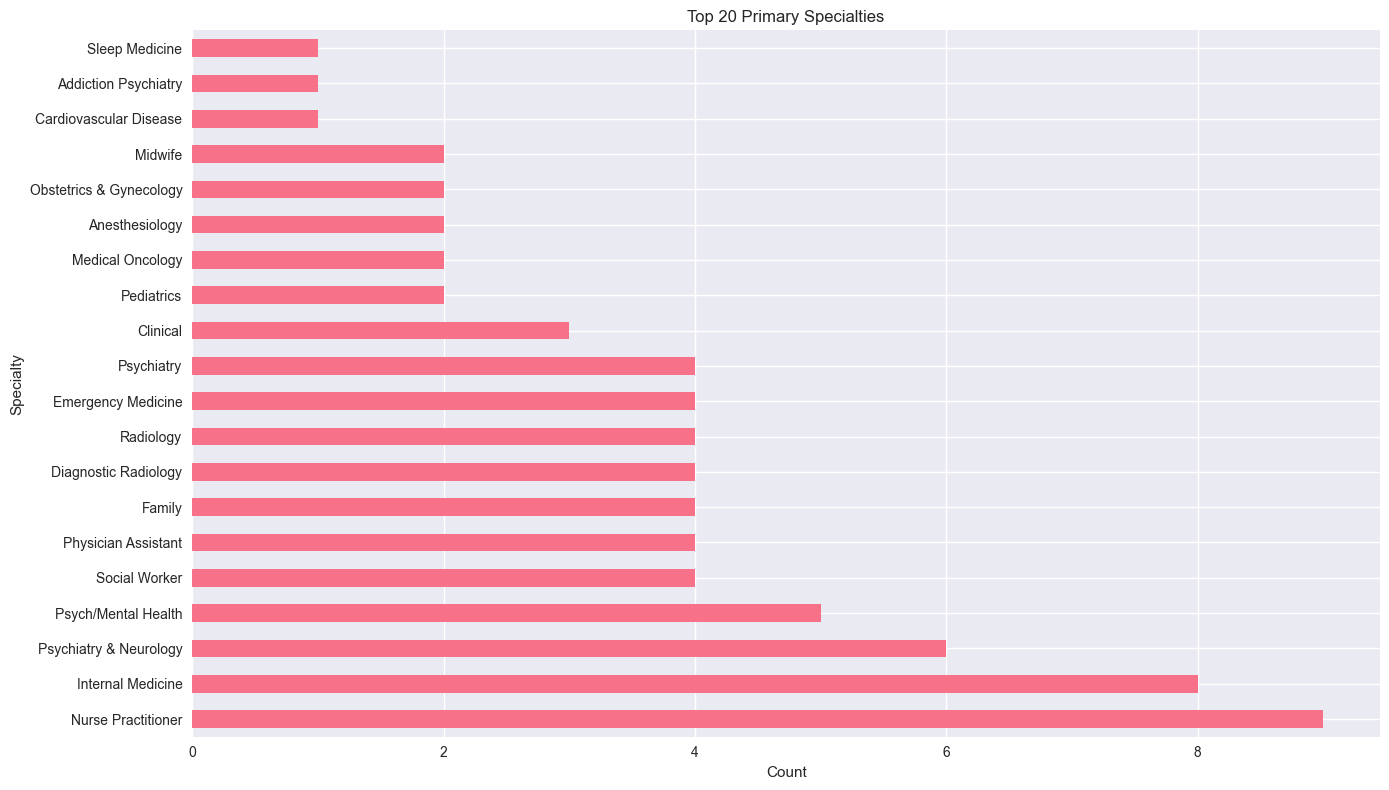


📋 Secondary Specialties Analysis
Secondary specialties column info:
Type: <class 'numpy.ndarray'>
Sample values:
  Row 0: []
  Row 1: ['Pediatrics, Pediatric Pulmonology']
  Row 2: ['Registered Nurse']
  Row 3: []
  Row 4: ['Internal Medicine, Medical Oncology']

Total secondary specialty entries: 32
Unique secondary specialties: 18

Top 20 Secondary Specialties:
Student in an Organized Health Care Education/Training Program    5
Psychiatry & Neurology, Addiction Psychiatry                      4
Psychiatry & Neurology, Psychiatry                                3
Registered Nurse                                                  2
Radiology, Diagnostic Radiology                                   2
Internal Medicine, Medical Oncology                               2
Radiology, Vascular & Interventional Radiology                    2
Emergency Medicine                                                2
Pediatrics, Pediatric Pulmonology                                 1
Specialist           

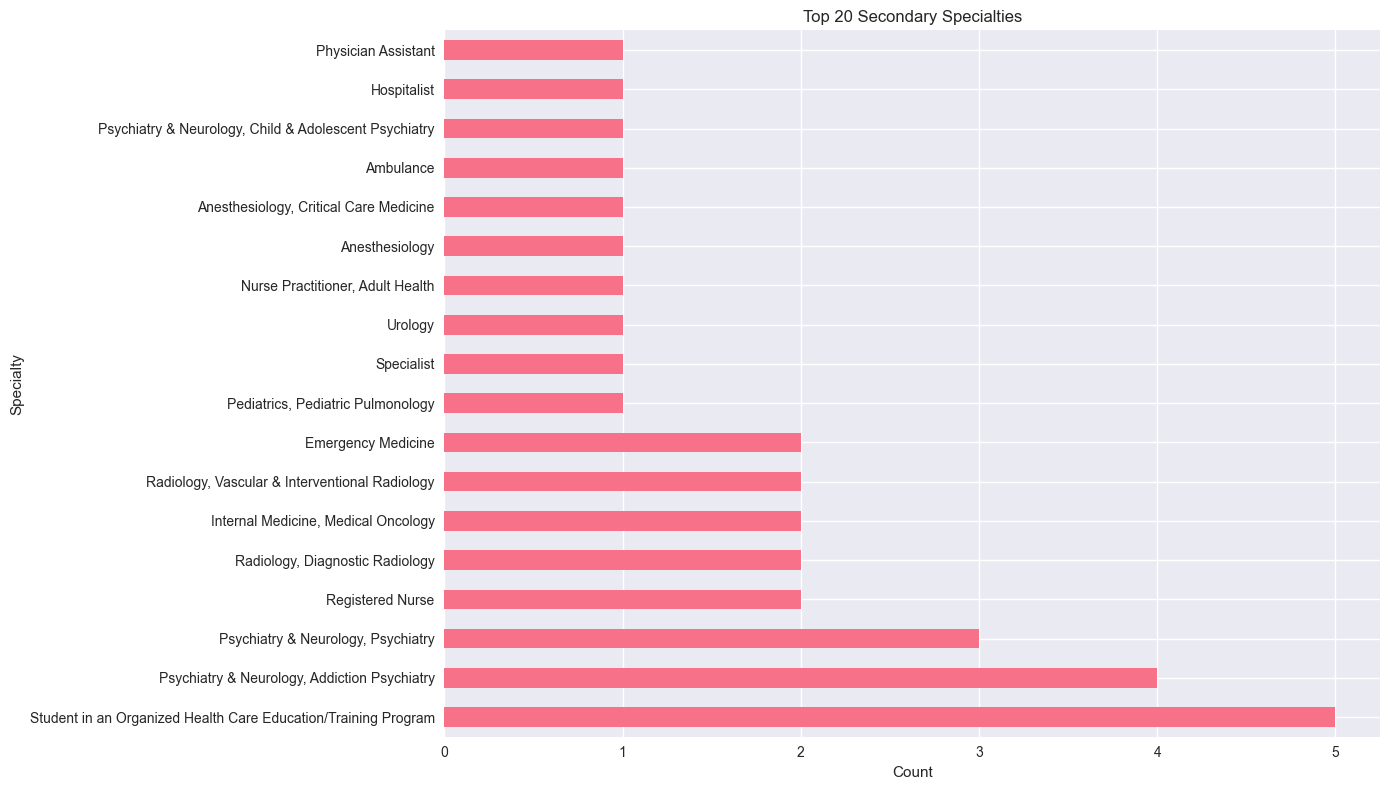


�� Combined Specialty Analysis
Total specialty entries (primary + secondary): 114
Unique specialties: 44

Top 30 All Specialties:
Nurse Practitioner                                                9
Internal Medicine                                                 8
Psychiatry & Neurology                                            6
Emergency Medicine                                                6
Physician Assistant                                               5
Student in an Organized Health Care Education/Training Program    5
Psych/Mental Health                                               5
Family                                                            4
Radiology                                                         4
Social Worker                                                     4
Diagnostic Radiology                                              4
Psychiatry                                                        4
Psychiatry & Neurology, Addiction Psychiatry         

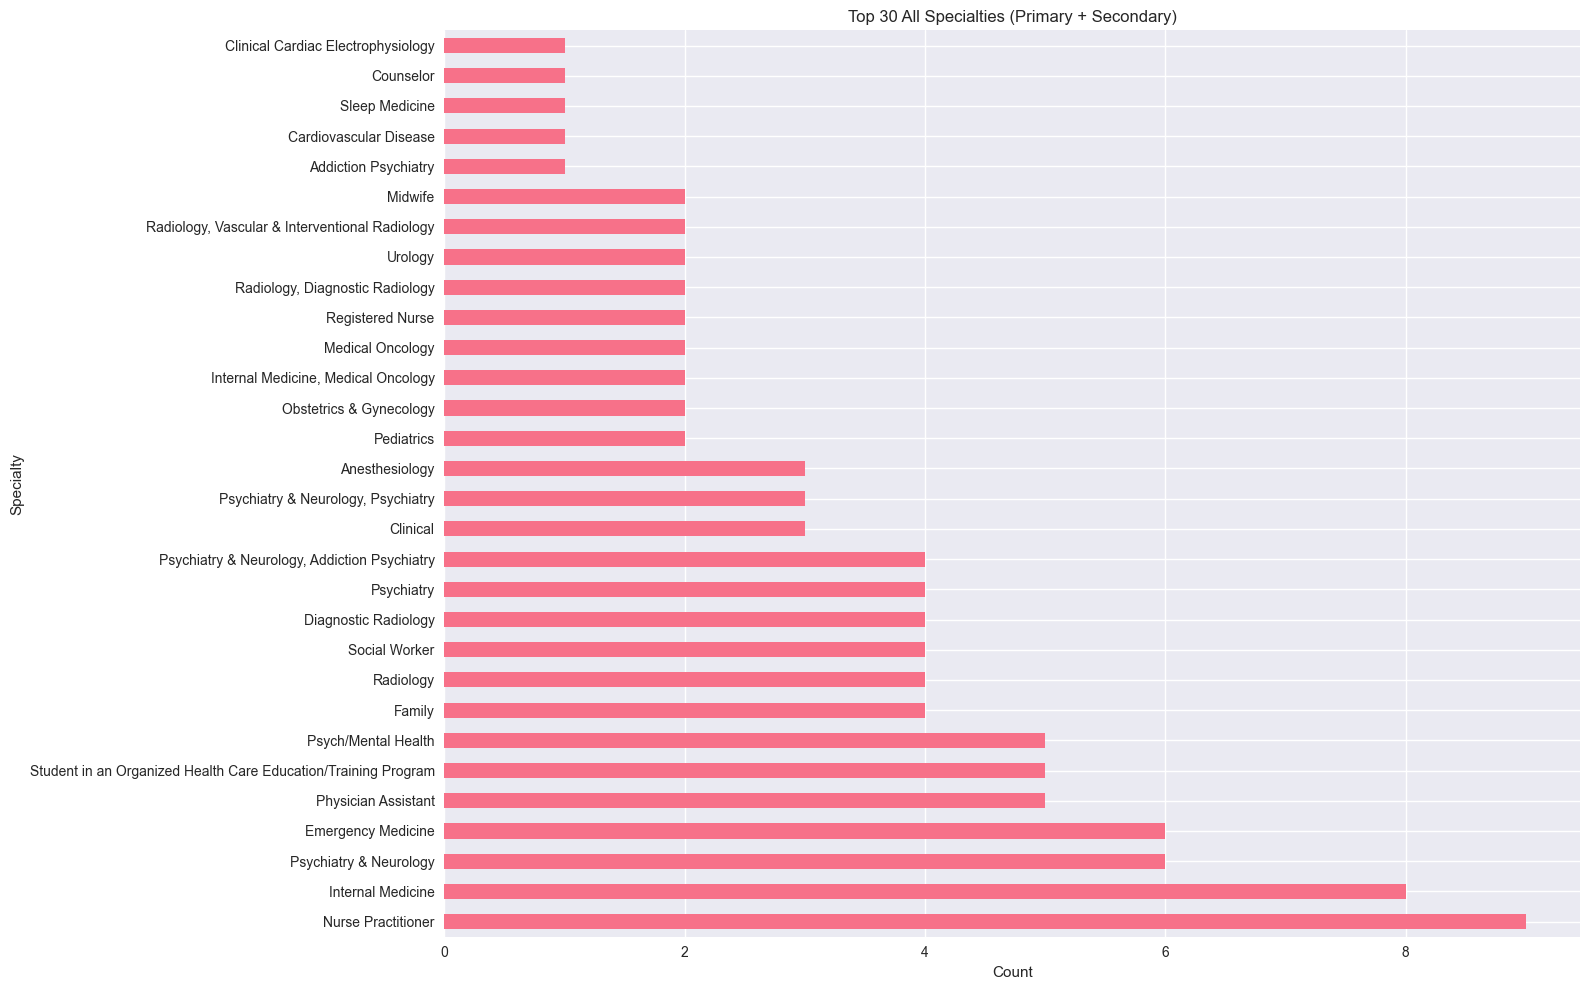


�� Specialty Coverage Analysis
Providers with primary specialty: 50 (100.0%)
Providers with secondary specialties: 23 (46.0%)
Providers with any specialty: 50 (100.0%)


ValueError: Wedge sizes 'x' must be non negative values

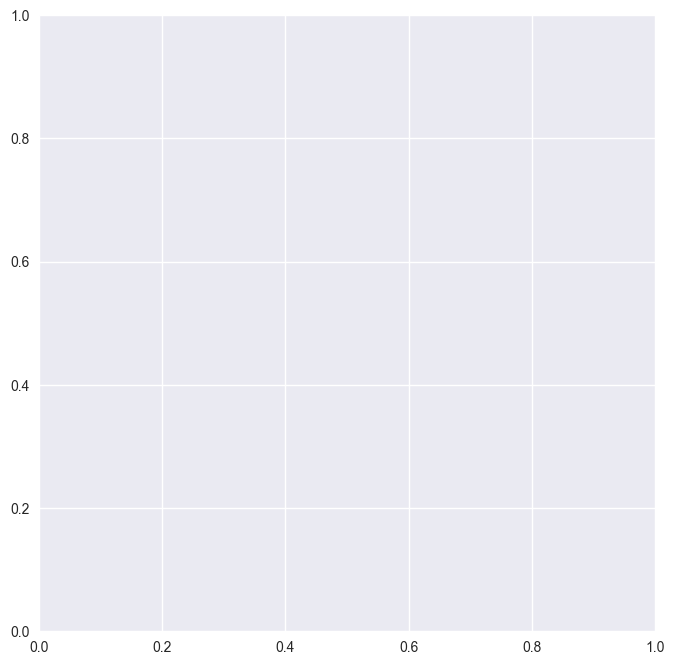

In [10]:
# Specialty and Taxonomy Analysis
print("\n🏥 Specialty and Taxonomy Analysis")
print("="*50)

# Inspect specialty columns
print("Specialty-related columns:")
specialty_cols = [col for col in df.columns if 'specialty' in col.lower()]
print(specialty_cols)

print("\n" + "="*50)

# Primary Specialty Analysis
print("📋 Primary Specialty Analysis")
print("="*30)

# Check data types and sample values
print("Primary specialty column info:")
print(f"Type: {type(df['primary_specialty'].iloc[0])}")
print(f"Sample values:")
for i in range(min(5, len(df))):
    print(f"  Row {i}: {df['primary_specialty'].iloc[i]}")

# Extract and analyze primary specialties
primary_specialties = []
for specialty in df['primary_specialty']:
    if isinstance(specialty, str) and specialty.strip():
        # Split by comma in case there are multiple specialties
        specialties = [s.strip() for s in specialty.split(',')]
        primary_specialties.extend(specialties)

primary_specialty_counts = pd.Series(primary_specialties).value_counts()
print(f"\nTotal primary specialty entries: {len(primary_specialties):,}")
print(f"Unique primary specialties: {len(primary_specialty_counts):,}")

if len(primary_specialty_counts) > 0:
    print("\nTop 20 Primary Specialties:")
    print(primary_specialty_counts.head(20))
    
    # Visualize top specialties
    plt.figure(figsize=(14, 8))
    primary_specialty_counts.head(20).plot(kind='barh')
    plt.title('Top 20 Primary Specialties')
    plt.xlabel('Count')
    plt.ylabel('Specialty')
    plt.tight_layout()
    plt.show()
else:
    print("No primary specialties found.")

print("\n" + "="*50)

# Secondary Specialties Analysis
print("📋 Secondary Specialties Analysis")
print("="*30)

# Check data types and sample values
print("Secondary specialties column info:")
print(f"Type: {type(df['secondary_specialties'].iloc[0])}")
print(f"Sample values:")
for i in range(min(5, len(df))):
    print(f"  Row {i}: {df['secondary_specialties'].iloc[i]}")

# Extract and analyze secondary specialties
secondary_specialties = []
for specialties in df['secondary_specialties']:
    if isinstance(specialties, list) and len(specialties) > 0:
        secondary_specialties.extend(specialties)
    elif isinstance(specialties, np.ndarray) and specialties.size > 0:
        secondary_specialties.extend(specialties.tolist())

secondary_specialty_counts = pd.Series(secondary_specialties).value_counts()
print(f"\nTotal secondary specialty entries: {len(secondary_specialties):,}")
print(f"Unique secondary specialties: {len(secondary_specialty_counts):,}")

if len(secondary_specialty_counts) > 0:
    print("\nTop 20 Secondary Specialties:")
    print(secondary_specialty_counts.head(20))
    
    # Visualize top secondary specialties
    plt.figure(figsize=(14, 8))
    secondary_specialty_counts.head(20).plot(kind='barh')
    plt.title('Top 20 Secondary Specialties')
    plt.xlabel('Count')
    plt.ylabel('Specialty')
    plt.tight_layout()
    plt.show()
else:
    print("No secondary specialties found.")

print("\n" + "="*50)

# Combined Specialty Analysis
print("�� Combined Specialty Analysis")
print("="*30)

# Combine all specialties
all_specialties = primary_specialties + secondary_specialties
all_specialty_counts = pd.Series(all_specialties).value_counts()

print(f"Total specialty entries (primary + secondary): {len(all_specialties):,}")
print(f"Unique specialties: {len(all_specialty_counts):,}")

if len(all_specialty_counts) > 0:
    print("\nTop 30 All Specialties:")
    print(all_specialty_counts.head(30))
    
    # Visualize top combined specialties
    plt.figure(figsize=(16, 10))
    all_specialty_counts.head(30).plot(kind='barh')
    plt.title('Top 30 All Specialties (Primary + Secondary)')
    plt.xlabel('Count')
    plt.ylabel('Specialty')
    plt.tight_layout()
    plt.show()
else:
    print("No specialties found.")

print("\n" + "="*50)

# Specialty Coverage Analysis
print("�� Specialty Coverage Analysis")
print("="*30)

# Count providers with different types of specialty information
providers_with_primary = df['primary_specialty'].apply(
    lambda x: isinstance(x, str) and bool(x.strip())
).sum()

providers_with_secondary = df['secondary_specialties'].apply(
    lambda x: (isinstance(x, list) and len(x) > 0) or 
              (isinstance(x, np.ndarray) and x.size > 0)
).sum()

providers_with_any_specialty = df.apply(
    lambda row: (isinstance(row['primary_specialty'], str) and bool(row['primary_specialty'].strip())) or
                (isinstance(row['secondary_specialties'], list) and len(row['secondary_specialties']) > 0) or
                (isinstance(row['secondary_specialties'], np.ndarray) and row['secondary_specialties'].size > 0),
    axis=1
).sum()

print(f"Providers with primary specialty: {providers_with_primary:,} ({providers_with_primary/len(df)*100:.1f}%)")
print(f"Providers with secondary specialties: {providers_with_secondary:,} ({providers_with_secondary/len(df)*100:.1f}%)")
print(f"Providers with any specialty: {providers_with_any_specialty:,} ({providers_with_any_specialty/len(df)*100:.1f}%)")

# Visualize specialty coverage
coverage_data = {
    'Primary Only': providers_with_primary - providers_with_secondary,
    'Secondary Only': providers_with_secondary - providers_with_primary,
    'Both': providers_with_secondary,
    'None': len(df) - providers_with_any_specialty
}

plt.figure(figsize=(10, 8))
plt.pie(coverage_data.values(), labels=coverage_data.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Specialty Information Coverage')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n" + "="*50)

# Specialty by Provider Type
print("📋 Specialty by Provider Type")
print("="*30)

# Analyze specialties for individual vs organization providers
individual_providers = df[df['provider_type'] == 'Individual']
org_providers = df[df['provider_type'] == 'Organization']

print(f"Individual providers: {len(individual_providers):,}")
print(f"Organization providers: {len(org_providers):,}")


org_primary_counts = pd.Series(org_primary).value_counts()

print(f"\nTop 10 Individual Provider Specialties:")
print(ind_primary_counts.head(10))

print(f"\nTop 10 Organization Specialties:")
print(org_primary_counts.head(10))

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ind_primary_counts.head(10).plot(kind='barh', ax=ax1, title='Top 10 Individual Provider Specialties')
ax1.set_xlabel('Count')

org_primary_counts.head(10).plot(kind='barh', ax=ax2, title='Top 10 Organization Specialties')
ax2.set_xlabel('Count')

plt.tight_layout()
plt.show()

�� NPPES Data Quality Analysis
Missing Data Analysis:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []


IndexError: index 0 is out of bounds for axis 0 with size 0

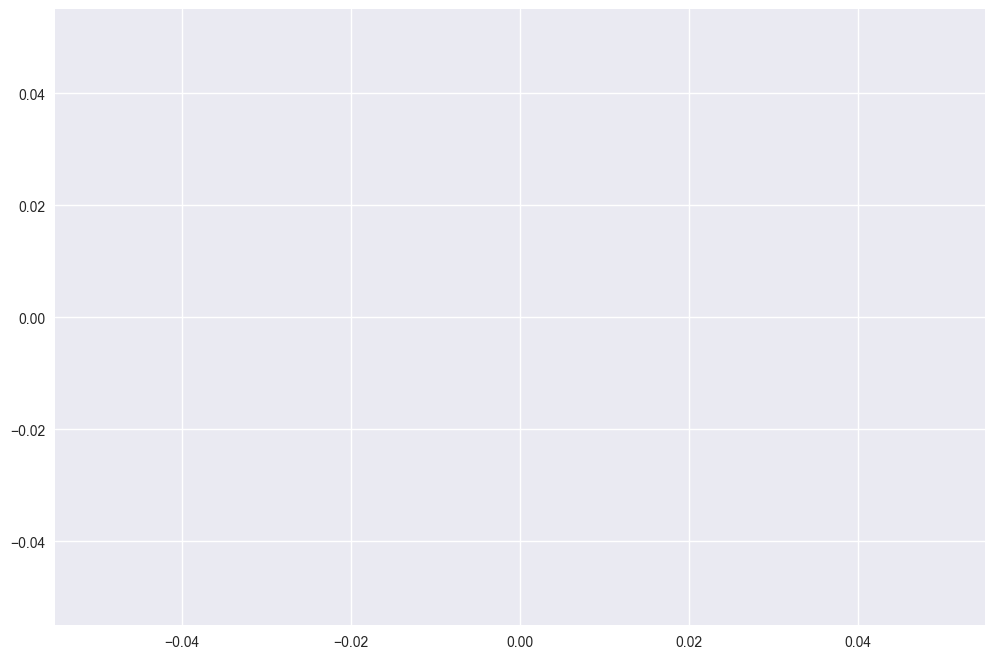

In [2]:
# NPPES Data Quality and Coverage Analysis
print("�� NPPES Data Quality Analysis")
print("="*50)

# Check for missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

quality_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Data Analysis:")
print(quality_df[quality_df['Missing_Count'] > 0])

# Visualize missing data
plt.figure(figsize=(12, 8))
missing_percentage[missing_percentage > 0].plot(kind='barh')
plt.title('Missing Data Percentage by Column')
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Column')
plt.tight_layout()
plt.show()

# Check for duplicate NPIs
duplicate_npis = df['npi'].duplicated().sum()
print(f"\nDuplicate NPIs: {duplicate_npis}")

# Check fetch status
fetch_status = df['metadata'].apply(
    lambda x: x.get('fetch_status') if isinstance(x, dict) else 'unknown'
).value_counts()

print(f"\nFetch Status Distribution:")
print(fetch_status)
print(f"Success Rate: {fetch_status.get('success', 0) / len(df) * 100:.2f}%")


👥 Provider Type and Demographics Analysis
Provider Types:
provider_type
Individual      49
Organization     1
Name: count, dtype: int64


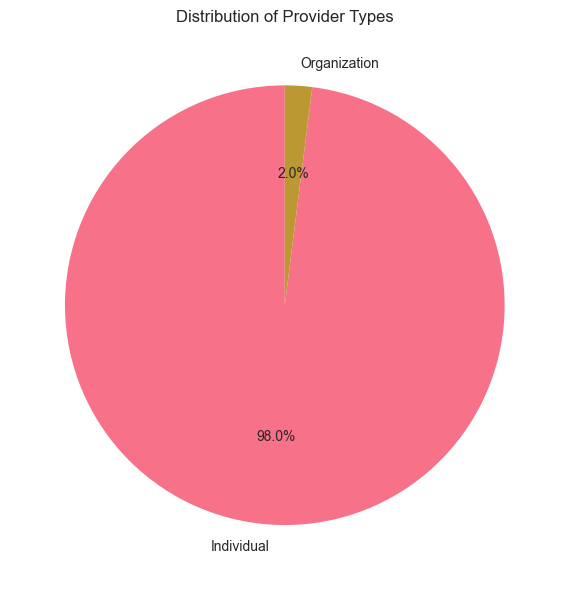


Gender Distribution (Individual Providers):
gender
F    30
M    19
Name: count, dtype: int64


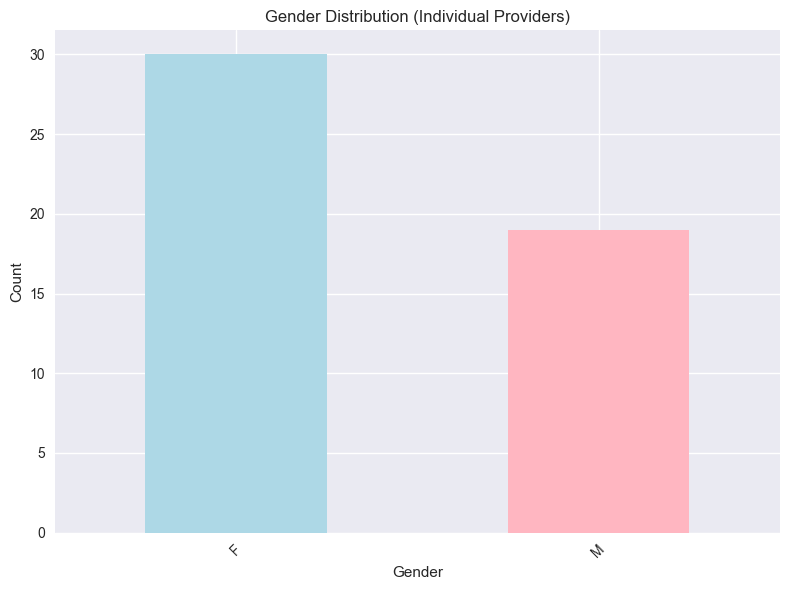

In [3]:
# Provider Type and Demographics Analysis
print("\n👥 Provider Type and Demographics Analysis")
print("="*50)

# Provider types
provider_types = df['provider_type'].value_counts()
print("Provider Types:")
print(provider_types)

# Visualize provider types
plt.figure(figsize=(10, 6))
provider_types.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Provider Types')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Gender distribution (for Individual providers)
individual_providers = df[df['provider_type'] == 'Individual']
if len(individual_providers) > 0:
    gender_dist = individual_providers['gender'].value_counts()
    print("\nGender Distribution (Individual Providers):")
    print(gender_dist)
    
    # Visualize gender distribution
    plt.figure(figsize=(8, 6))
    gender_dist.plot(kind='bar', color=['lightblue', 'lightpink', 'lightgray'])
    plt.title('Gender Distribution (Individual Providers)')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [5]:
# Geographic Analysis
print("\n🗺️ Geographic Analysis")
print("="*50)

# Extract states from addresses
states = []
for addresses in df['addresses']:
    if isinstance(addresses, list):
        for addr in addresses:
            if isinstance(addr, dict) and 'state' in addr and addr['state']:
                states.append(addr['state'])

state_counts = pd.Series(states).value_counts()
print(f"Providers with state information: {len(states):,}")

if len(states) > 0:
    print("\nTop 20 States:")
    print(state_counts.head(20))
    
    # Visualize top states
    plt.figure(figsize=(14, 8))
    state_counts.head(20).plot(kind='bar')
    plt.title('Top 20 States by Provider Count')
    plt.xlabel('State')
    plt.ylabel('Provider Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No state information found in the dataset.")

# Address type analysis
address_types = []
for addresses in df['addresses']:
    if isinstance(addresses, list):
        for addr in addresses:
            if isinstance(addr, dict) and 'type' in addr:
                address_types.append(addr['type'])

address_type_counts = pd.Series(address_types).value_counts()
print("\nAddress Types:")
print(address_type_counts)

if len(address_types) > 0:
    # Visualize address types
    plt.figure(figsize=(12, 6))
    address_type_counts.plot(kind='bar')
    plt.title('Distribution of Address Types')
    plt.xlabel('Address Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No address type information found in the dataset.")


🗺️ Geographic Analysis
Providers with state information: 0
No state information found in the dataset.

Address Types:
Series([], Name: count, dtype: int64)
No address type information found in the dataset.


In [ ]:
# Specialty and Credentials Analysis
print("\n�� Specialty and Credentials Analysis")
print("="*50)

# Primary specialties
primary_specialties = df['primary_specialty'].apply(
    lambda x: x if isinstance(x, str) and x.strip() else None
).dropna()

print(f"Providers with primary specialties: {len(primary_specialties):,} ({len(primary_specialties)/len(df)*100:.1f}%)")

# Top 20 primary specialties
top_specialties = primary_specialties.value_counts().head(20)
print("\nTop 20 Primary Specialties:")
print(top_specialties)

# Visualize top specialties
plt.figure(figsize=(14, 8))
top_specialties.plot(kind='barh')
plt.title('Top 20 Primary Specialties')
plt.xlabel('Count')
plt.ylabel('Specialty')
plt.tight_layout()
plt.show()

# Credentials analysis
providers_with_credentials = df['credentials'].apply(
    lambda x: isinstance(x, list) and len(x) > 0
).sum()

print(f"\nProviders with credentials: {providers_with_credentials:,} ({providers_with_credentials/len(df)*100:.1f}%)")

# Analyze common credentials
all_credentials = []
for creds in df['credentials']:
    if isinstance(creds, list):
        all_credentials.extend(creds)

credential_counts = pd.Series(all_credentials).value_counts()
print("\nTop 20 Credentials:")
print(credential_counts.head(20))

# Visualize top credentials
plt.figure(figsize=(12, 8))
credential_counts.head(15).plot(kind='barh')
plt.title('Top 15 Credentials')
plt.xlabel('Count')
plt.ylabel('Credential')
plt.tight_layout()
plt.show()

In [ ]:
# Temporal Analysis
print("\n📅 Temporal Analysis")
print("="*50)

# Convert datetime columns
df['enumeration_date'] = pd.to_datetime(df['enumeration_date'], errors='coerce')
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

# Enumeration date analysis
valid_enumeration = df['enumeration_date'].notna()
print(f"Providers with enumeration dates: {valid_enumeration.sum():,} ({valid_enumeration.sum()/len(df)*100:.1f}%)")

if valid_enumeration.sum() > 0:
    print(f"Earliest enumeration: {df['enumeration_date'].min()}")
    print(f"Latest enumeration: {df['enumeration_date'].max()}")
    
    # Plot enumeration by year
    plt.figure(figsize=(12, 6))
    df[valid_enumeration]['enumeration_date'].dt.year.value_counts().sort_index().plot(kind='line', marker='o')
    plt.title('Provider Enumeration by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Providers')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Last updated analysis
valid_last_updated = df['last_updated'].notna()
print(f"\nProviders with last updated dates: {valid_last_updated.sum():,} ({valid_last_updated.sum()/len(df)*100:.1f}%)")

if valid_last_updated.sum() > 0:
    print(f"Earliest last updated: {df['last_updated'].min()}")
    print(f"Latest last updated: {df['last_updated'].max()}")
    
    # Plot last updated by year
    plt.figure(figsize=(12, 6))
    df[valid_last_updated]['last_updated'].dt.year.value_counts().sort_index().plot(kind='line', marker='o')
    plt.title('Provider Last Updated by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Providers')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
# Summary Statistics
print("\n📊 NPPES Dataset Summary Statistics")
print("="*50)

summary_stats = {
    'Total Providers': len(df),
    'Individual Providers': len(df[df['provider_type'] == 'Individual']),
    'Organization Providers': len(df[df['provider_type'] == 'Organization']),
    'Providers with Addresses': df['addresses'].apply(lambda x: isinstance(x, list) and len(x) > 0).sum(),
    'Providers with Primary Specialty': df['primary_specialty'].apply(lambda x: isinstance(x, str) and bool(x.strip())).sum(),
    'Providers with Credentials': df['credentials'].apply(lambda x: isinstance(x, list) and len(x) > 0).sum(),
    'Successfully Fetched': df['metadata'].apply(lambda x: isinstance(x, dict) and x.get('fetch_status') == 'success').sum(),
    'Unique States': len(set([addr.get('state') for addresses in df['addresses'] if isinstance(addresses, list) for addr in addresses if isinstance(addr, dict) and addr.get('state')])),
    'Unique Primary Specialties': df['primary_specialty'].apply(lambda x: x if isinstance(x, str) and x.strip() else None).dropna().nunique(),
    'Data Freshness': df['metadata'].apply(lambda x: x.get('fetched_at') if isinstance(x, dict) else None).dropna().max()
}

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Count'])
print(summary_df.to_string(index=False))

# Calculate key percentages
print("\n📈 Key Percentages:")
print(f"Fetch Success Rate: {summary_stats['Successfully Fetched']/summary_stats['Total Providers']*100:.2f}%")
print(f"Providers with Addresses: {summary_stats['Providers with Addresses']/summary_stats['Total Providers']*100:.2f}%")
print(f"Providers with Specialties: {summary_stats['Providers with Primary Specialty']/summary_stats['Total Providers']*100:.2f}%")
print(f"Providers with Credentials: {summary_stats['Providers with Credentials']/summary_stats['Total Providers']*100:.2f}%")

print(f"\n🎯 NPPES Dataset is ready for joining with provider data!")
print(f"Use the NPPESJoiner class to enrich your provider datasets as needed.")